###  Load Data

In [11]:
# import libreries

import pandas as pd
import numpy as np
import nltk
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
from sklearn import svm
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from  sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
import seaborn as sns

In [4]:
df =  pd.read_csv("./data/Emotion_final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [77]:
df.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


In [78]:
df.shape

(21459, 2)

In [5]:
nltk.download(['stopwords', 'punkt', 'wordnet'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
corpus = df.Text
targets = df.Emotion

In [7]:
stop_words = nltk.corpus.stopwords.words("english")
def tokenize(text):
    text = ''.join([ch for ch in text if ch not in df.Text])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [82]:
vectorizer = CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))

In [9]:
X = vectorizer.fit_transform(corpus)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [10]:
print(X.shape)
print(len(corpus))
print(len(vectorizer.get_feature_names()))

(21459, 143013)
21459
143013


### Plot for word frequency

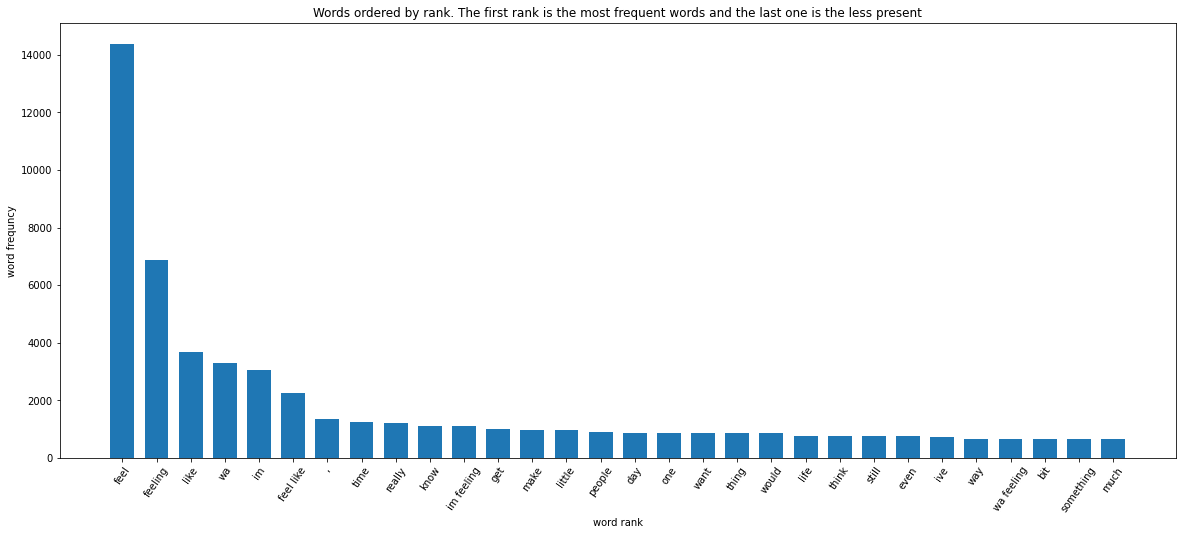

In [11]:
# Compute rank
words = vectorizer.get_feature_names()
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

# Sub-sample the data to plot.
# take the 20 first + the rest sample with the given step 
def subsample(x):
    return np.hstack((x[:30]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('word rank')
plt.ylabel('word frequncy')
plt.title("Words ordered by rank. The first rank is the most frequent words and the last one is the less present");

### Split set

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, targets, test_size=0.2, random_state=0)

print("x_train :", np.size(x_train))
print("x_test :", np.size(x_test))
print("ratio :", round(np.size(x_test)/(np.size(x_train)+np.size(x_test))*100))

x_train : 304893
x_test : 76635
ratio : 20


### Logistic regression

In [106]:
logistic_regression = LogisticRegression(max_iter =1000)
logistic_regression.fit(x_train, y_train)

# Prediction
pred = logistic_regression.predict(x_test)


In [107]:
# percent score
score = logistic_regression.score(x_test, y_test)
print(score)

0.9007455731593662


In [108]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       anger       0.90      0.89      0.90       600
        fear       0.89      0.84      0.87       526
       happy       0.90      0.94      0.92      1399
        love       0.85      0.78      0.81       325
     sadness       0.92      0.95      0.93      1258
    surprise       0.83      0.67      0.74       184

    accuracy                           0.90      4292
   macro avg       0.88      0.85      0.86      4292
weighted avg       0.90      0.90      0.90      4292



In [15]:
#test
print(logistic_regression.predict(X[2]))
print(logistic_regression.predict(X[30]))

['anger']
['happy']


### SVM

In [16]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
pred = clf.predict(x_test)

In [101]:
score = clf.score(x_test, y_test)
print(score)

0.7917054986020503


In [102]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       anger       0.88      0.89      0.89       600
        fear       0.86      0.84      0.85       526
       happy       0.92      0.93      0.92      1399
        love       0.80      0.82      0.81       325
     sadness       0.93      0.93      0.93      1258
    surprise       0.76      0.73      0.74       184

    accuracy                           0.90      4292
   macro avg       0.86      0.86      0.86      4292
weighted avg       0.90      0.90      0.90      4292



### SVM One Vs One Classifier Linear SVC

In [103]:
oneVsOne = OneVsOneClassifier(LinearSVC())
oneVsOne.fit(x_train, y_train)
pred = oneVsOne.predict(x_test)

score = oneVsOne.score(x_test, y_test)
print('Socre : ', score)

Socre :  0.8953867660764212


In [104]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       anger       0.88      0.89      0.89       600
        fear       0.86      0.84      0.85       526
       happy       0.92      0.93      0.92      1399
        love       0.80      0.82      0.81       325
     sadness       0.93      0.93      0.93      1258
    surprise       0.76      0.73      0.74       184

    accuracy                           0.90      4292
   macro avg       0.86      0.86      0.86      4292
weighted avg       0.90      0.90      0.90      4292



In [22]:
#test
print(oneVsOne.predict(X[2]))
print(oneVsOne.predict(X[30]))

['anger']
['happy']


### Confusion matrix

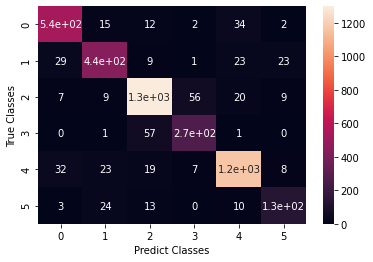

In [23]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predict Classes')
plt.show()

### Compare other multiclasses regression with pipline

In [7]:

from time import time
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.decomposition import FastICA, KernelPCA, TruncatedSVD, SparsePCA, NMF, FactorAnalysis, LatentDirichletAllocation

import nltk


In [9]:
# GLOBAL VARIBLES
df =  pd.read_csv("./data/Emotion_final.csv")
stop_words = nltk.corpus.stopwords.words("english")
corpus = np.array(df['Text'])
targets = np.array(df['Emotion'])

In [10]:
def tokenize(text):
    text = ''.join([ch for ch in text if ch not in df.Text])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [13]:
pipe0 = Pipeline([
    ('vect', CountVectorizer()),
    ('sgd', SGDClassifier()),
])
pipe1 = Pipeline([
    ('vect', CountVectorizer()),
    ('svml', LinearSVC()),
])
pipe2 = Pipeline([
    ('vect', CountVectorizer()),
    ('mult_nb', MultinomialNB()),
])
pipe3 = Pipeline([
    ('vect', CountVectorizer()),
    ('bern_nb', BernoulliNB()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer()),
    ('logit', LogisticRegression(max_iter = 1000)),
])
pipe5 = Pipeline([
    ('vect', CountVectorizer()),
    ('sgd', SGDClassifier()),
])
pipe6 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svml', LinearSVC()),
])
pipe7 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('bern_nb', BernoulliNB()),
])
pipe8 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words)),
    ('tfidf', TfidfTransformer()),
    ('mult_nb', MultinomialNB()),
])
pipe9 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logit', LogisticRegression(max_iter = 1000)),
])
parameters = {
    'stop_words': stop_words,
    'ngram_range': (1,2)
    }

def run_pipes(pipes, splits=10, test_size=0.2, seed=0):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = corpus[idx_train]
            X_test = corpus[idx_test]
            y_train = targets[idx_train]
            y_test = targets[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                f1_score(y_test, y, average = 'macro'),
                precision_score(y_test, y,average='macro'),
                recall_score(y_test, y, average='macro')
                
            ])
    return res

def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_score": [arr[:,1].mean().round(3), arr[:,1].std().round(3)],
            "Precision" : [arr[:,2].mean().round(3), arr[:,2].std().round(3)],
            "Recall" : [arr[:,3].mean().round(3), arr[:,3].std().round(3)]
        }

    df = pd.DataFrame.from_dict(final, orient="index")
    return df

In [21]:
# run base pipes withtout tfid
res = run_pipes([pipe0, pipe1, pipe2, pipe3, pipe4, pipe5])

In [22]:
print_table(res)

,time,f1_score,Precision,Recall
vect-sgd,1.19,"[0.898, 0.005]","[0.898, 0.005]","[0.899, 0.005]"
vect-svml,4.78,"[0.901, 0.005]","[0.901, 0.005]","[0.902, 0.005]"
vect-mult_nb,0.92,"[0.692, 0.006]","[0.787, 0.004]","[0.735, 0.004]"
vect-bern_nb,0.92,"[0.453, 0.004]","[0.418, 0.062]","[0.586, 0.004]"
vect-logit,26.57,"[0.892, 0.005]","[0.893, 0.005]","[0.894, 0.005]"


In [65]:
from joblib import dump

dump(res, 'filename.pkl') 


['filename.pkl']

In [24]:
# run bas pipes with tfid
res1 = run_pipes([pipe6, pipe7, pipe8, pipe9])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print_table(res1)

,time,f1_score,Precision,Recall
vect-tfidf-svml,1.58,"[0.9, 0.004]","[0.9, 0.004]","[0.901, 0.004]"
vect-tfidf-bern_nb,0.96,"[0.453, 0.004]","[0.418, 0.062]","[0.586, 0.004]"
vect-tfidf-mult_nb,19.80,"[0.561, 0.005]","[0.741, 0.019]","[0.647, 0.004]"
vect-tfidf-logit,27.16,"[0.843, 0.003]","[0.857, 0.003]","[0.85, 0.003]"


In [66]:
dump(res1, 'filename1.pkl')

['filename1.pkl']

###  Load data set 

In [29]:
df1 =  pd.read_csv("./data/text_emotion.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [33]:
df1.head(10)

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?


In [34]:
number_emotion1 = df1.groupby("sentiment").count()
number_emotion1

,tweet_id,author,content
sentiment,,,
anger,110,110,110
boredom,179,179,179
empty,827,827,827
enthusiasm,759,759,759
fun,1776,1776,1776
happiness,5209,5209,5209
hate,1323,1323,1323
love,3842,3842,3842
neutral,8638,8638,8638


### Vectorizing 


In [30]:
corpus1 = df1.content
targets1 = df1.sentiment

In [36]:
stop_words = nltk.corpus.stopwords.words("english")

In [37]:
vectorizer1 = CountVectorizer(stop_words = stop_words, ngram_range= (1, 2))

In [38]:
X1 = vectorizer1.fit_transform(corpus1)

In [39]:
X1.shape

(40000, 253407)

Text(0.5, 1.0, 'Words ordered by rank. The first rank is the most frequent words and the last one is the less present')

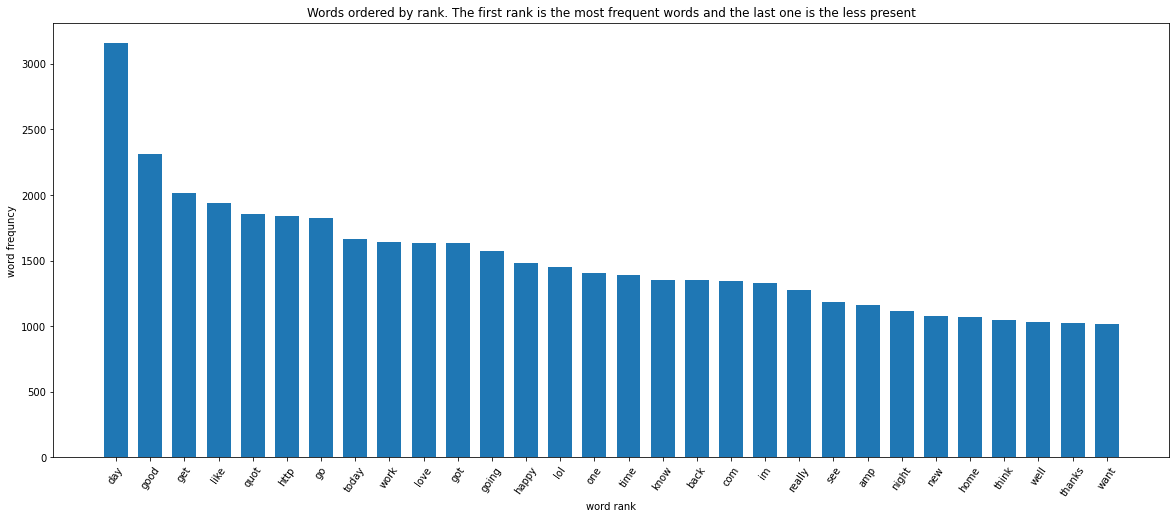

In [40]:
words = vectorizer1.get_feature_names()
wsum = np.array(X1.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

# Sub-sample the data to plot.
# take the 20 first + the rest sample with the given step 
def subsample(x):
    return np.hstack((x[:30]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('word rank')
plt.ylabel('word frequncy')
plt.title("Words ordered by rank. The first rank is the most frequent words and the last one is the less present")

### Split set

In [41]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, targets1, test_size=0.2, random_state=0)

print("x_train :", np.size(x_train))
print("x_test :", np.size(x_test))
print("ratio :", round(np.size(x_test)/(np.size(x_train)+np.size(x_test))*100))

x_train : 304893
x_test : 76635
ratio : 20


### Logistic regression

In [42]:
logistic_regression1 = LogisticRegression(max_iter =1000)
logistic_regression1.fit(x_train1, y_train1)

# Prediction
pred1 = logistic_regression1.predict(x_test1)

# percent score
score = logistic_regression1.score(x_test1, y_test1)
print(round(score, 3))

0.34


In [43]:
print(classification_report(y_test1, pred1))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        37
       empty       0.10      0.01      0.01       147
  enthusiasm       0.00      0.00      0.00       147
         fun       0.21      0.06      0.09       354
   happiness       0.32      0.32      0.32      1052
        hate       0.33      0.13      0.18       251
        love       0.51      0.40      0.45       780
     neutral       0.34      0.59      0.43      1743
      relief       0.19      0.05      0.08       292
     sadness       0.34      0.27      0.30      1062
    surprise       0.16      0.04      0.06       422
       worry       0.33      0.40      0.36      1694

    accuracy                           0.34      8000
   macro avg       0.22      0.17      0.18      8000
weighted avg       0.32      0.34      0.31      8000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [44]:
clf1 = svm.SVC()
clf1.fit(x_train1, y_train1)
pred1 = clf1.predict(x_test1)
score = clf1.score(x_test1, y_test1)
print(round(score, 3))

0.338


In [45]:
print(classification_report(y_test1, pred1))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        37
       empty       0.00      0.00      0.00       147
  enthusiasm       0.00      0.00      0.00       147
         fun       0.00      0.00      0.00       354
   happiness       0.34      0.34      0.34      1052
        hate       0.40      0.08      0.13       251
        love       0.57      0.35      0.43       780
     neutral       0.33      0.61      0.43      1743
      relief       0.25      0.01      0.01       292
     sadness       0.42      0.13      0.20      1062
    surprise       0.27      0.01      0.02       422
       worry       0.30      0.50      0.37      1694

    accuracy                           0.34      8000
   macro avg       0.22      0.16      0.15      8000
weighted avg       0.33      0.34      0.29      8000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM OneVsOne Classifier

In [46]:
oneVsOne1 = OneVsOneClassifier(LinearSVC())
oneVsOne1.fit(x_train1, y_train1)
pred1 = oneVsOne1.predict(x_test1)

score = oneVsOne1.score(x_test1, y_test1)
print('Socre : ',round(score, 3))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Socre :  0.327


In [47]:
print(classification_report(y_test1, pred1))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        37
       empty       0.03      0.01      0.01       147
  enthusiasm       0.04      0.01      0.01       147
         fun       0.17      0.07      0.10       354
   happiness       0.33      0.32      0.32      1052
        hate       0.32      0.16      0.22       251
        love       0.47      0.40      0.43       780
     neutral       0.34      0.56      0.42      1743
      relief       0.15      0.08      0.10       292
     sadness       0.31      0.25      0.28      1062
    surprise       0.15      0.06      0.09       422
       worry       0.32      0.36      0.34      1694

    accuracy                           0.33      8000
   macro avg       0.20      0.17      0.18      8000
weighted avg       0.30      0.33      0.31      8000



### Confusion matrix

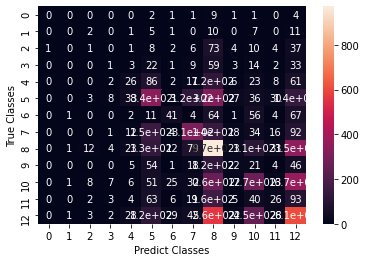

In [48]:
sns.heatmap(confusion_matrix(y_test1, pred1), annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predict Classes')
plt.show()

### Use pipline

In [37]:
pipe0 = Pipeline([
    ('vect', CountVectorizer()),
    ('sgd', SGDClassifier()),
])
pipe1 = Pipeline([
    ('vect', CountVectorizer()),
  
    ('vect', CountVectorizer()),
    ('mult_nb', MultinomialNB()),
])
pipe3 = Pipeline([
    ('vect', CountVectorizer()),
    ('bern_nb', BernoulliNB()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer()),
    ('logit', LogisticRegression(max_iter = 1000)),
])
pipe5 = Pipeline([
    ('vect', CountVectorizer()),
    ('sgd', SGDClassifier()),
])
pipe6 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svml', LinearSVC()),
])
pipe7 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('bern_nb', BernoulliNB()),
])
pipe8 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('mult_nb', MultinomialNB()),
])
pipe9 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logit', LogisticRegression(max_iter = 1000)),
])
parameters = {
    'stop_words': stop_word,
    'ngram_range': (1,2)
    }
def run_pipes1(pipes, splits=10, test_size=0.2, seed=0):  
    res2 = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus1):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train1 = corpus1[idx_train]
            X_test1 = corpus1[idx_test]
            y_train1 = targets1[idx_train]
            y_test1 = targets1[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train1, y_train1)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test1)
            res2[name].append([
                fit_time,
                f1_score(y_test1, y, average = 'weighted'),
                precision_score(y_test1, y,average='weighted'),
                recall_score(y_test1, y, average='weighted')
            ])
    return res2

def print_table1(res2):
    # Compute mean and std
    final = {}
    for model in res2:
        arr = np.array(res2[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_score": [arr[:,1].mean().round(3), arr[:,1].std().round(3)],
            "Precision" : [arr[:,2].mean().round(3), arr[:,2].std().round(3)],
            "Recall" : [arr[:,3].mean().round(3), arr[:,3].std().round(3)]
        }
        

    df1 = pd.DataFrame.from_dict(final, orient="index")
    return df1

In [38]:
# run base pipes withtout tfid
res3 = run_pipes1([pipe0, pipe1, pipe2, pipe3, pipe4, pipe5])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [39]:
print_table(res3)

,time,f1_score,Precision,Recall
vect-sgd,3.23,"[0.306, 0.004]","[0.303, 0.003]","[0.332, 0.005]"
vect-svml,30.41,"[0.298, 0.005]","[0.294, 0.004]","[0.32, 0.005]"
vect-mult_nb,1.65,"[0.256, 0.003]","[0.285, 0.013]","[0.311, 0.003]"
vect-bern_nb,1.67,"[0.158, 0.003]","[0.236, 0.06]","[0.267, 0.004]"
vect-logit,132.27,"[0.315, 0.003]","[0.32, 0.004]","[0.345, 0.004]"


In [67]:
dump(res3, 'filename2.pkl') 


['filename2.pkl']

In [41]:
res4 = run_pipes1([pipe6, pipe7, pipe8, pipe9])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

In [42]:
print_table1(res4)

,time,f1_score,Precision,Recall
vect-tfidf-svml,5.07,"[0.307, 0.003]","[0.301, 0.002]","[0.327, 0.003]"
vect-tfidf-bern_nb,1.75,"[0.158, 0.003]","[0.236, 0.06]","[0.267, 0.004]"
vect-tfidf-mult_nb,1.76,"[0.209, 0.003]","[0.28, 0.011]","[0.291, 0.003]"
vect-tfidf-logit,144.33,"[0.315, 0.003]","[0.34, 0.01]","[0.35, 0.003]"


In [68]:
dump(res4, 'filename3.pkl')

['filename3.pkl']

### Concate two data sets

In [44]:
df2 = df.append(df1[['content','sentiment']].rename(columns={"content": "Text", "sentiment": "Emotion"}),ignore_index=True)

In [45]:
df2.Emotion = df2.Emotion.replace(['happiness', 'worry'], ['happy', 'fear'])

In [46]:
df2

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
61454,@JohnLloydTaylor,neutral
61455,Happy Mothers Day All my love,love
61456,Happy Mother's Day to all the mommies out ther...,love
61457,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happy


In [47]:
corpus2 = df2.Text
targets2 = df2.Emotion

In [58]:
stop_words = nltk.corpus.stopwords.words("english")

In [59]:
vectorizer2 = CountVectorizer(stop_words = stop_words, ngram_range= (1, 2))

In [60]:
X2 = vectorizer2.fit_transform(corpus2)

Text(0.5, 1.0, 'Words ordered by rank. The first rank is the most frequent words and the last one is the less present')

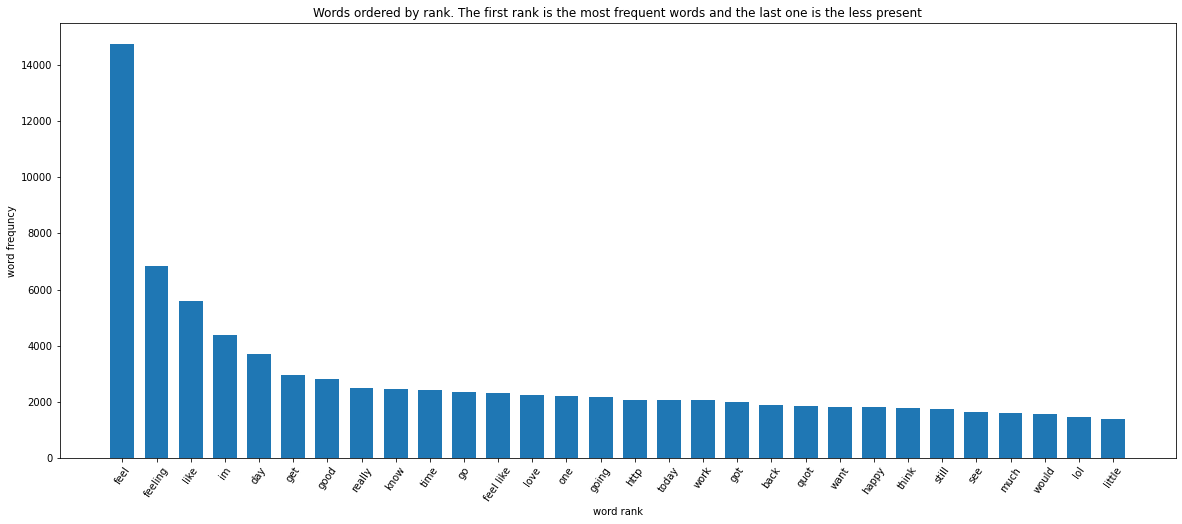

In [61]:
words = vectorizer2.get_feature_names()
wsum = np.array(X2.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

# Sub-sample the data to plot.
# take the 20 first + the rest sample with the given step 
def subsample(x):
    return np.hstack((x[:30]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('word rank')
plt.ylabel('word frequncy')
plt.title("Words ordered by rank. The first rank is the most frequent words and the last one is the less present")

### Split set

In [62]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, targets2, test_size=0.2, random_state=0)

print("x_train :", np.size(x_train2))
print("x_test :", np.size(x_test2))
print("ratio :", round(np.size(x_test2)/(np.size(x_train2)+np.size(x_test2))*100))

x_train : 747701
x_test : 188857
ratio : 20


### Logistic regression

In [63]:
logistic_regression2 = LogisticRegression(max_iter =1000)
logistic_regression2.fit(x_train2, y_train2)

# Prediction
pred2 = logistic_regression2.predict(x_test2)

# percent score
score = logistic_regression2.score(x_test2, y_test2)
print(round(score, 3))

0.524


In [64]:
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

       anger       0.88      0.77      0.82       616
     boredom       0.00      0.00      0.00        37
       empty       0.10      0.01      0.01       158
  enthusiasm       0.11      0.01      0.01       166
        fear       0.44      0.49      0.46      2235
         fun       0.18      0.05      0.08       352
       happy       0.64      0.68      0.66      2459
        hate       0.43      0.19      0.26       258
        love       0.57      0.46      0.51      1109
     neutral       0.34      0.60      0.44      1689
      relief       0.31      0.07      0.12       317
     sadness       0.66      0.65      0.65      2272
    surprise       0.46      0.21      0.28       624

    accuracy                           0.52     12292
   macro avg       0.39      0.32      0.33     12292
weighted avg       0.52      0.52      0.51     12292



### SVM

In [65]:
clf2 = svm.SVC()
clf2.fit(x_train2, y_train2)
pred2 = clf2.predict(x_test2)
score = clf2.score(x_test2, y_test2)
print(round(score, 3))

0.483


In [66]:
print(classification_report(y_test2, pred2))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.92      0.47      0.63       616
     boredom       0.00      0.00      0.00        37
       empty       0.00      0.00      0.00       158
  enthusiasm       0.00      0.00      0.00       166
        fear       0.39      0.51      0.44      2235
         fun       0.00      0.00      0.00       352
       happy       0.52      0.72      0.60      2459
        hate       0.52      0.09      0.15       258
        love       0.60      0.31      0.41      1109
     neutral       0.33      0.59      0.42      1689
      relief       0.60      0.01      0.02       317
     sadness       0.68      0.58      0.63      2272
    surprise       0.69      0.07      0.13       624

    accuracy                           0.48     12292
   macro avg       0.41      0.26      0.26     12292
weighted avg       0.51      0.48      0.45     12292



### SVM OneVsOne classifier

In [67]:
oneVsOne2 = OneVsOneClassifier(LinearSVC())
oneVsOne2.fit(x_train2, y_train2)
pred2 = oneVsOne2.predict(x_test2)

score = oneVsOne2.score(x_test2, y_test2)
print('Socre : ',round(score, 3))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Socre :  0.507


In [68]:
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

       anger       0.85      0.80      0.82       616
     boredom       0.00      0.00      0.00        37
       empty       0.14      0.03      0.05       158
  enthusiasm       0.07      0.01      0.01       166
        fear       0.43      0.46      0.45      2235
         fun       0.19      0.09      0.12       352
       happy       0.63      0.65      0.64      2459
        hate       0.37      0.20      0.26       258
        love       0.54      0.46      0.50      1109
     neutral       0.34      0.57      0.42      1689
      relief       0.17      0.07      0.10       317
     sadness       0.64      0.62      0.63      2272
    surprise       0.39      0.20      0.26       624

    accuracy                           0.51     12292
   macro avg       0.37      0.32      0.33     12292
weighted avg       0.50      0.51      0.50     12292



### Confusion matrix

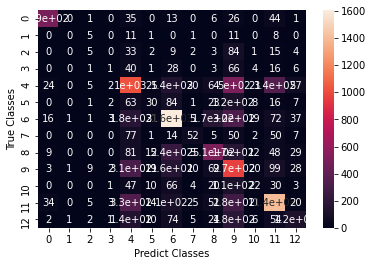

In [69]:
sns.heatmap(confusion_matrix(y_test2, pred2), annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predict Classes')
plt.show()

### Use pipline

In [57]:
pipe0 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('sgd', SGDClassifier()),
])

pipe1 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('svml', LinearSVC()),
])
pipe2 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('mult_nb', MultinomialNB()),
])
pipe3 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('bern_nb', BernoulliNB()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('logit', LogisticRegression(max_iter = 1000)),
])
pipe5 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('sgd', SGDClassifier()),
])

pipe6 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('svml', LinearSVC()),
])
pipe7 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('bern_nb', BernoulliNB()),
])
pipe8 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('mult_nb', MultinomialNB()),
])
pipe9 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('logit', LogisticRegression(max_iter = 1000)),
])
def run_pipes2(pipes, splits=10, test_size=0.2, seed=0):  
    res3 = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus2):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train2 = corpus2[idx_train]
            X_test2 = corpus2[idx_test]
            y_train2 = targets2[idx_train]
            y_test2 = targets2[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train2, y_train2)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test2)
            res3[name].append([
                fit_time,
                f1_score(y_test2, y, average = 'weighted'),
                precision_score(y_test2, y,average='weighted'),
                recall_score(y_test2, y, average='weighted')
            ])
    return res3

def print_table2(res3):
    # Compute mean and std
    final = {}
    for model in res3:
        arr = np.array(res3[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_score": [arr[:,1].mean().round(3), arr[:,1].std().round(3)],
            "Precision" : [arr[:,2].mean().round(3), arr[:,2].std().round(3)],
            "Recall" : [arr[:,3].mean().round(3), arr[:,3].std().round(3)]
        }

    df2 = pd.DataFrame.from_dict(final, orient="index")
    return df2

In [58]:
# run base pipes withtout tfid
res5 = run_pipes2([pipe0, pipe1, pipe2, pipe3, pipe4, pipe5])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/u

In [59]:
print_table2(res5)

,time,f1_score,Precision,Recall
vect-sgd,5.37,"[0.503, 0.006]","[0.502, 0.007]","[0.52, 0.005]"
vect-svml,59.12,"[0.496, 0.004]","[0.494, 0.005]","[0.509, 0.003]"
vect-mult_nb,2.74,"[0.369, 0.005]","[0.433, 0.01]","[0.432, 0.004]"
vect-bern_nb,2.76,"[0.275, 0.005]","[0.376, 0.03]","[0.375, 0.006]"
vect-logit,230.51,"[0.505, 0.005]","[0.516, 0.006]","[0.521, 0.005]"


In [60]:
dump(res5, 'filename4.pkl') 


['filename4.pkl']

In [61]:
# run base pipes witht tfid
res6 = run_pipes2([pipe6, pipe7, pipe8, pipe9], splits=1)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
print_table2(res6)

,time,f1_score,Precision,Recall
vect-tfidf-svml,8.60,"[0.49, 0.0]","[0.483, 0.0]","[0.513, 0.0]"
vect-tfidf-bern_nb,2.80,"[0.279, 0.0]","[0.374, 0.0]","[0.382, 0.0]"
vect-tfidf-mult_nb,2.81,"[0.334, 0.0]","[0.461, 0.0]","[0.421, 0.0]"
vect-tfidf-logit,223.35,"[0.482, 0.0]","[0.5, 0.0]","[0.51, 0.0]"


In [69]:
dump(res6, 'filename5.pkl')

['filename5.pkl']